# ScorecardPy package for credit risk scorecard (using Log.Reg.)

For further reference see: https://github.com/ShichenXie/scorecardpy

To install see: https://pypi.org/project/scorecardpy/

Full documentation for R version: https://cran.r-project.org/web/packages/scorecard/scorecard.pdf

## 1. Getting started, loading data

In [49]:
# Importing necessary libraries
import scorecardpy as sc
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
# load germancredit data
dat = sc.germancredit()

In [3]:
# To import your own data
# dat = pd.read_csv(r'path to your data file\ScoreCardData.csv',sep='|',encoding='ANSI',decimal=',',quotechar='"')

In [4]:
# Observing imported data
dat.head()

,status.of.existing.checking.account,duration.in.month,credit.history,purpose,credit.amount,savings.account.and.bonds,present.employment.since,installment.rate.in.percentage.of.disposable.income,personal.status.and.sex,other.debtors.or.guarantors,...,property,age.in.years,other.installment.plans,housing,number.of.existing.credits.at.this.bank,job,number.of.people.being.liable.to.provide.maintenance.for,telephone,foreign.worker,creditability
0,... < 0 DM,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/ no savings account,... >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,good
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,bad
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,good
3,... < 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,building society savings agreement/ life insur...,45,none,for free,1,skilled employee / official,2,none,yes,good
4,... < 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,bad


In [5]:
# List columns (fields) of your dataset
field_list = dat.columns.tolist()
field_list

['status.of.existing.checking.account',
 'duration.in.month',
 'credit.history',
 'purpose',
 'credit.amount',
 'savings.account.and.bonds',
 'present.employment.since',
 'installment.rate.in.percentage.of.disposable.income',
 'personal.status.and.sex',
 'other.debtors.or.guarantors',
 'present.residence.since',
 'property',
 'age.in.years',
 'other.installment.plans',
 'housing',
 'number.of.existing.credits.at.this.bank',
 'job',
 'number.of.people.being.liable.to.provide.maintenance.for',
 'telephone',
 'foreign.worker',
 'creditability']

In [6]:
# Pick fields from field_list to calculate IV-scores on (if left blank, or x=None then all fields are used in calculation)
chosen_fields = ["credit.history", 'savings.account.and.bonds', 'purpose', 'credit.amount', 'property', 'age.in.years', 
                 'job', 'number.of.people.being.liable.to.provide.maintenance.for', 'creditability']

# Create new dataframe with chosen fields
df_chosen_fields = dat[chosen_fields]

## 2. Calculating & visualizing IV-scores

In [7]:
# Calculate IV-scores of chosen fields
df_chosen_fields_IV = sc.iv(df_chosen_fields, y = "creditability")
df_chosen_fields_IV

C:\Users\pripka\AppData\Local\Continuum\anaconda3\lib\site-packages\scorecardpy\condition_fun.py:113: UserWarning: The positive value in "creditability" was replaced by 1 and negative value by 0.
  warnings.warn("The positive value in \"{}\" was replaced by 1 and negative value by 0.".format(y))


,variable,info_value
2,credit.history,0.293234
6,age.in.years,0.260453
3,savings.account.and.bonds,0.196010
1,purpose,0.169195
7,property,0.112638
0,credit.amount,0.054639
4,job,0.008763
5,number.of.people.being.liable.to.provide.maint...,0.000043


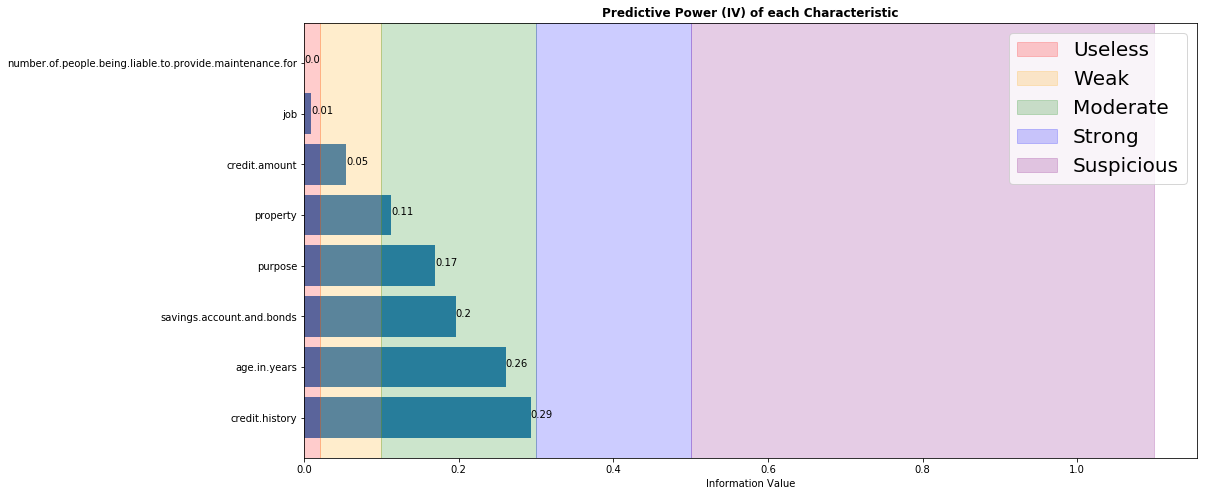

In [8]:
# Plot IV-scores of chosen fields
plt.figure(figsize=(16,8))
plt.barh(df_chosen_fields_IV['variable'], df_chosen_fields_IV['info_value'], color = '#317DC2')
plt.xlabel('Information Value')
plt.title('Predictive Power (IV) of each Characteristic', fontweight="bold");

# Creating colored areas
Useless=plt.axvspan(0, 0.02, alpha=0.2, color='red', Label='Useless')
Weak=plt.axvspan(0.02, 0.1, alpha=0.2, color='orange', Label='Weak')
Moderate=plt.axvspan(0.1, 0.3, alpha=0.2, color='green', Label='Moderate')
Strong=plt.axvspan(0.3, 0.5, alpha=0.2, color='blue', Label='Strong')
Suspicious=plt.axvspan(0.5, 1.1, alpha=0.2, color='purple', Label='Suspicious')

# Creating labels for legend
red_patch = mpatches.Patch(color='red', alpha=0.2, label='Useless')
yellow_patch = mpatches.Patch(color='yellow', alpha=0.2, label='Weak')
green_patch = mpatches.Patch(color='green', alpha=0.2, label='Moderate')
blue_patch = mpatches.Patch(color='blue', alpha=0.2, label='Strong')
purple_patch = mpatches.Patch(color='purple', alpha=0.2, label='Suspicious')
plt.legend(handles=[Useless, Weak, Moderate, Strong, Suspicious], fontsize=20)

# Showing numerical (IV) values
for index, value in enumerate(df_chosen_fields_IV['info_value']):
    plt.text(value, index, str(round(value, 2)))

In [9]:
# Creating a df with variables with good IV score (0.1-0.5)
df_with_good_IV_values = df_chosen_fields_IV[df_chosen_fields_IV['info_value'].between(0.1, 0.5)]

print("The suggested variables to pick from are:")
print(df_with_good_IV_values)

The suggested variables to pick from are:
                    variable  info_value
2             credit.history    0.293234
6               age.in.years    0.260453
3  savings.account.and.bonds    0.196010
1                    purpose    0.169195
7                   property    0.112638


In [10]:
# Creating a list with - good IV-score - variables
good_IV_fields = df_with_good_IV_values['variable'].tolist()
good_IV_fields

['credit.history',
 'age.in.years',
 'savings.account.and.bonds',
 'purpose',
 'property']

In [11]:
# Pick fields from field_list to calculate IV-scores on (if left blank, or x=None then all fields are used in calculation)
good_IV_fields_pick = ["credit.history", 'savings.account.and.bonds', 'age.in.years', 'purpose', 'creditability']

# Create new dataframe with chosen fields
df_chosen_IV_fields = dat[good_IV_fields_pick]

## 3. Filtering variables

In [12]:
# Filter variables based on specified conditions, such as information value (IV-score), missing rate, identical value rate
dt_s = sc.var_filter(df_chosen_IV_fields, y="creditability")
dt_s.columns.to_list()

[INFO] filtering variables ...


C:\Users\pripka\AppData\Local\Continuum\anaconda3\lib\site-packages\scorecardpy\condition_fun.py:113: UserWarning: The positive value in "creditability" was replaced by 1 and negative value by 0.
  warnings.warn("The positive value in \"{}\" was replaced by 1 and negative value by 0.".format(y))


['age.in.years',
 'credit.history',
 'savings.account.and.bonds',
 'purpose',
 'creditability']

In [13]:
# breaking dataframe into train and test
train, test = sc.split_df(dt_s, 'creditability').values()

## 4. WOE-binning (creating, visualizing, modifying and exporting bins)

In [14]:
# WOE binning
bins_gc = sc.woebin(dt_s, y="creditability")

[INFO] creating woe binning ...


{'age.in.years': <Figure size 432x288 with 2 Axes>,
 'credit.history': <Figure size 432x288 with 2 Axes>,
 'savings.account.and.bonds': <Figure size 432x288 with 2 Axes>,
 'purpose': <Figure size 432x288 with 2 Axes>}

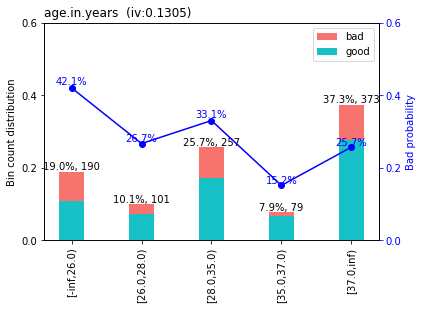

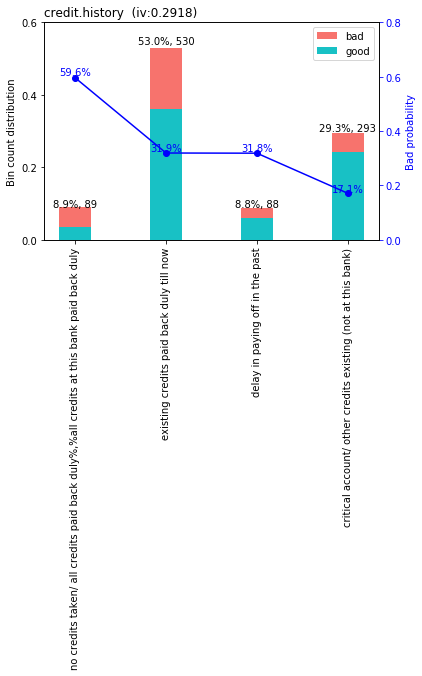

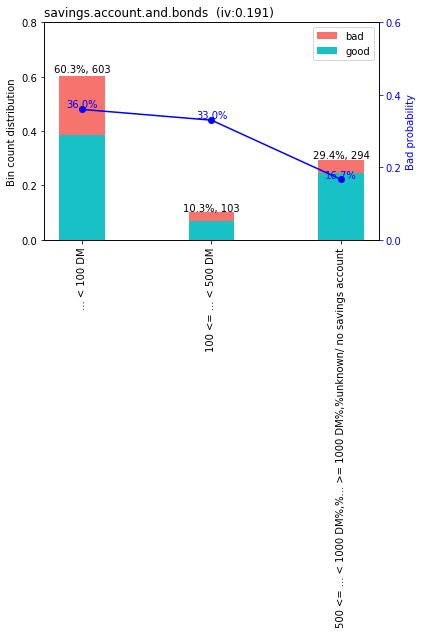

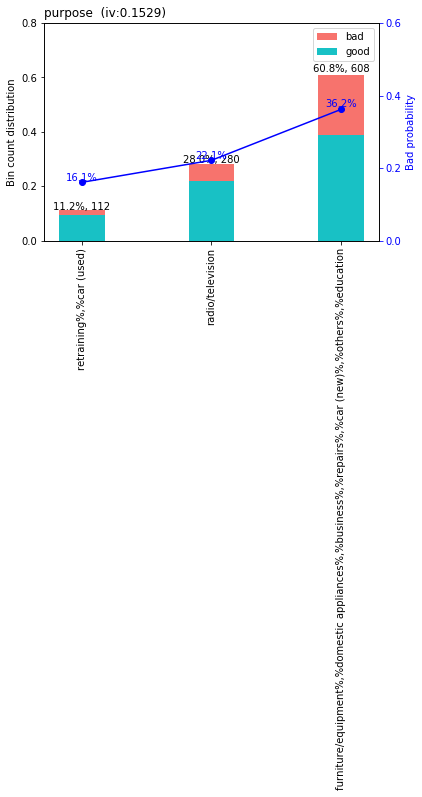

In [15]:
# Visualize bins of variables with plots
sc.woebin_plot(bins_gc)

## 4.1 WOE Binning Adjustment (manually adjust bins with breaks_list parameter)

In [ ]:
breaks_adj = {
    'age.in.years': [26, 36, 46, 56]
}
bins_adj = sc.woebin(dt_s, y="creditability", breaks_list=breaks_adj)

#visualize bins of >modified< variables with plots
sc.woebin_plot(bins_adj['age.in.years'])

## 4.2 WOE Binning Adjustment (interactively adjust bins with sc.woebin_adj fn)

In [1]:
#breaks_adj = sc.woebin_adj(dt_s, "creditability", bins)

## 4.3 Saving Binning plot(s) to file

In [ ]:
plotlist = sc.woebin_plot(bins_gc)
#plotlist = sc.woebin_plot(breaks_adj)


for key,i in plotlist.items():
    plt.show(i)
    #plt.savefig(str(key)+'.png', bbox_inches='tight')
    #plt.close(i)

# 5. WOE Transformation (woebin_ply fn)

In [18]:
# `woebin_ply` converts original input data into woe values based on the binning information generated from `woebin`.
#bins_gc_woe = sc.woebin_ply(dt_s, bins_gc, no_cores=None, print_step=0, replace_blank=True)
#bins_gc_woe

In [16]:
# converting train and test into woe values and also splitting our dataframe into train-test dataframes
train_woe = sc.woebin_ply(train, bins_gc)
test_woe = sc.woebin_ply(test, bins_gc)

y_train = train_woe.loc[:,'creditability']
X_train = train_woe.loc[:,train_woe.columns != 'creditability']
y_test = test_woe.loc[:,'creditability']
X_test = test_woe.loc[:,train_woe.columns != 'creditability']

[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [17]:
train_woe['savings.account.and.bonds_woe'].value_counts()
#train_woe.apply(pd.value_counts)

 0.271358    428
-0.762140    204
 0.139552     68
Name: savings.account.and.bonds_woe, dtype: int64

In [18]:
# logistic regression ------
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(X_train, y_train)
# lr.coef_
# lr.intercept_

LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l1', random_state=None, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# 6. Evaluation methods

In [22]:
# The perf_eva fn provides performance evaluations, such as kolmogorov-smirnow(ks), ROC, lift and precision-recall curves, 
# based on provided label and predicted probability values. You can use multiple evaluators at once such as 
# plot_type=["roc", "ks", "pr"] for example.

## 6.1 Receiver Operating Characteristic (ROC) Curve & ROC-AUC

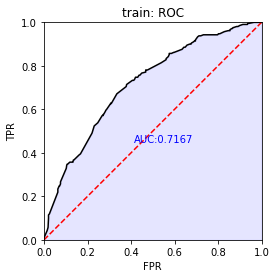

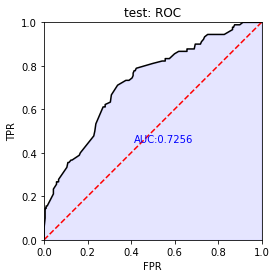

In [20]:
train_perf = sc.perf_eva(y_train, train_pred, title = "train", plot_type=["roc"])
test_perf = sc.perf_eva(y_test, test_pred, title = "test", plot_type=["roc"])

## 6.2 Precision-Recall (PR) & PR-AUC

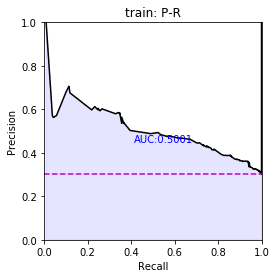

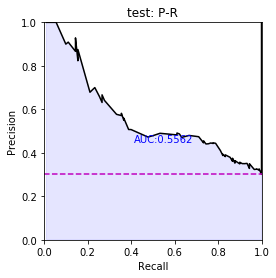

In [21]:
train_perf = sc.perf_eva(y_train, train_pred, title = "train", plot_type=["pr"])
test_perf = sc.perf_eva(y_test, test_pred, title = "test", plot_type=["pr"])

## 6.3 Kolmogorov-Smirnov (KS)

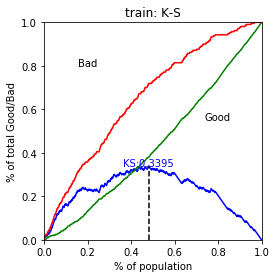

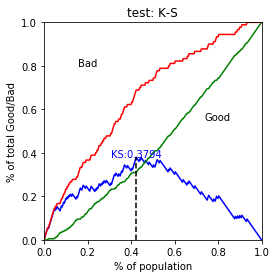

In [22]:
train_perf = sc.perf_eva(y_train, train_pred, title = "train", plot_type=["ks"])
test_perf = sc.perf_eva(y_test, test_pred, title = "test", plot_type=["ks"])

# 7. Creating a Scorecard (using sc.scorecard fn)

In [85]:
card = sc.scorecard(bins_gc, lr, X_train.columns)
#card
xbase = card['basepoints']['points'].tolist()
xbase

{'basepoints':      variable  bin  points
 0  basepoints  NaN   449.0,
 'age.in.years':        variable          bin  points
 0  age.in.years  [-inf,26.0)   -33.0
 1  age.in.years  [26.0,28.0)    10.0
 2  age.in.years  [28.0,35.0)    -9.0
 3  age.in.years  [35.0,37.0)    55.0
 4  age.in.years   [37.0,inf)    13.0,
 'credit.history':          variable                                                bin  points
 5  credit.history  no credits taken/ all credits paid back duly%,...   -74.0
 6  credit.history           existing credits paid back duly till now    -5.0
 7  credit.history                    delay in paying off in the past    -5.0
 8  credit.history  critical account/ other credits existing (not ...    44.0,
 'savings.account.and.bonds':                      variable  \
 9   savings.account.and.bonds   
 10  savings.account.and.bonds   
 11  savings.account.and.bonds   
 
                                                   bin  points  
 9                                        .

## 7.1 Calculating credit score (using sc.scorecard_ply fn)

In [25]:
# `scorecard_ply` calculates credit score using the results from `scorecard`.
train_score = sc.scorecard_ply(train, card, print_step=0)
test_score = sc.scorecard_ply(test, card, print_step=0)

# OR #
# To create the PSI plot for every feature >separately< use the 'only_total_score = FALSE' parameter
#train_score = sc.scorecard_ply(train, card, only_total_score=False)
#test_score = sc.scorecard_ply(test, card, only_total_score=False)

### 7.1.1 Calculating population stability index (PSI)

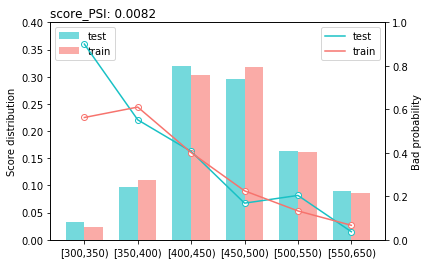

{'psi':   variable       PSI
 0    score  0.008217, 'pic': {'score': <Figure size 432x288 with 2 Axes>}}

In [26]:
# perf_psi calculates population stability index (PSI) and provides credit score distribution based on credit score datasets.
# if psi value is Less than 0.1	Insignificant change	No action required
# if psi value is between 0.1 – 0.25	Some minor change	Check other scorecard monitoring metrics
# if psi value is greater than 0.25	Major shift in population	Need to delve deeper
# The population stability index (PSI) formula is displayed below: 
# \deqn{PSI = \sum((Actual\% - Expected\%)*(\ln(\frac{Actual\%}{Expected\%}))).} 

# PSI score calculation
sc.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

## 7.1.3 Creating a dataframe with scores next to original values

In [29]:
#score1 = sc.scorecard_ply(dt_s, card)
score1 = sc.scorecard_ply(dt_s, card, only_total_score = False)
score1.head(5)

,age.in.years_points,credit.history_points,savings.account.and.bonds_points,purpose_points,score
0,13.0,44.0,42.0,30.0,578.0
1,-33.0,-5.0,-15.0,30.0,426.0
2,13.0,44.0,-15.0,-20.0,471.0
3,13.0,-5.0,-15.0,-20.0,422.0
4,13.0,-5.0,-15.0,-20.0,422.0


In [46]:
x = score1['score'].tolist()
score1['score'].mean()

459.052

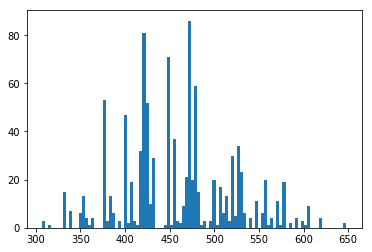

In [39]:
plt.hist(x, bins=100)
plt.show()

In [109]:
#z = pd.qcut(x,4, labels=["poor", "risky", "good", "excellent"])
#z.value_counts()
pd.qcut(x,q=[0, .25, .5, .75, 1.])
#pd.qcut(x,4)

[(499.0, 648.0], (422.0, 457.0], (457.0, 499.0], (306.999, 422.0], (306.999, 422.0], ..., (306.999, 422.0], (499.0, 648.0], (457.0, 499.0], (422.0, 457.0], (499.0, 648.0]]
Length: 1000
Categories (4, interval[float64]): [(306.999, 422.0] < (422.0, 457.0] < (457.0, 499.0] < (499.0, 648.0]]

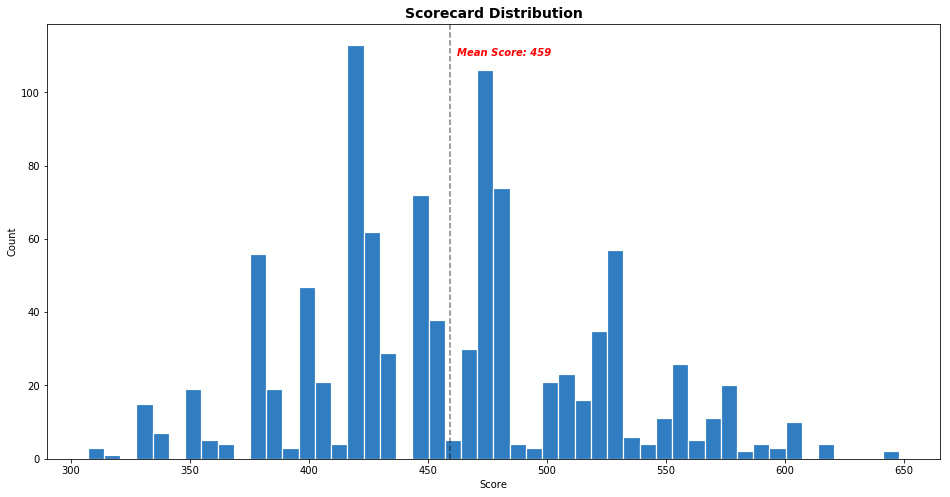

In [84]:
plt.figure(figsize=(16,8))

plt.hist(score1['score'],
         bins=50,
         edgecolor='white',
         color = '#317DC2',
         linewidth=1.2)

#plt.xlim(231,750)
plt.title('Scorecard Distribution', fontweight="bold", fontsize=14)
plt.axvline(score1['score'].mean(), color='k', linestyle='dashed', linewidth=1.5, alpha=0.5)
plt.text(462, 110, 'Mean Score: 459', color='red', fontweight='bold', style='italic', fontsize=10)
plt.xlabel('Score')
plt.ylabel('Count');

Text(530, 85, 'Excellent')

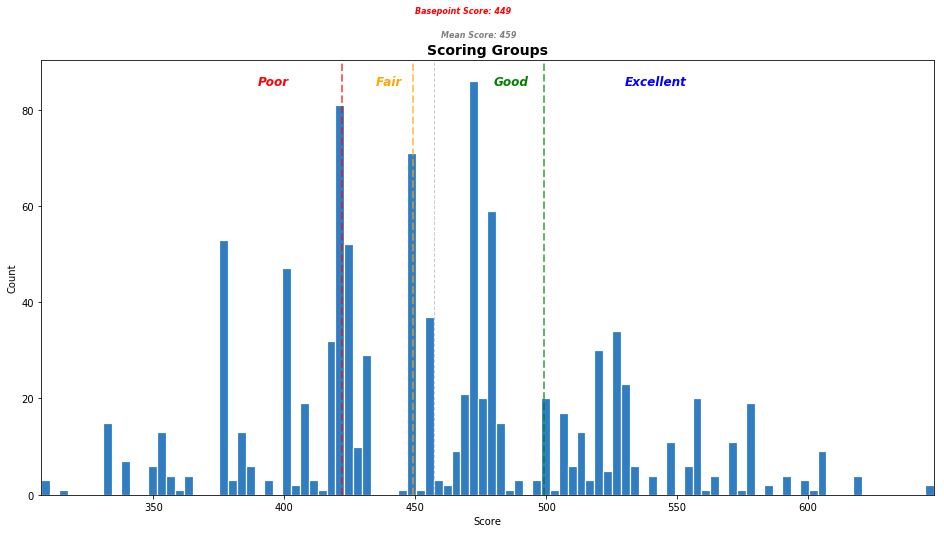

In [99]:
# Add Scoring Groups to Plot
plt.figure(figsize=(16,8))

plt.hist(score1['score'],
         bins=100,
         edgecolor='white',
         color = '#317DC2',
         linewidth=1.2)

#plt.xlim(score1['score'].min(),score1['score'].max())
plt.xlim(score1['score'].min(),score1['score'].max())
plt.title('Scoring Groups', fontweight="bold", fontsize=14)
plt.xlabel('Score')
plt.ylabel('Count')

# Percentile Lines
plt.axvline(np.percentile(score1['score'],25), color='red', linestyle='dashed', linewidth=2, alpha=0.6)
plt.axvline(np.percentile(score1['score'],50), color='k', linestyle='dashed', linewidth=1, alpha=0.2)
plt.axvline(np.percentile(score1['score'],75), color='green', linestyle='dashed', linewidth=2, alpha=0.6)
plt.text(460, 95, 'Mean Score: 459', color='k', fontweight='bold', style='italic', fontsize=8, alpha=0.5)

# Adding basepoint line
plt.axvline(xbase, color='orange', linestyle='dashed', linewidth=2, alpha=0.6)
plt.text(450, 100, 'Basepoint Score: 449', color='red', fontweight='bold', style='italic', fontsize=8)

# Text
plt.text(390, 85, 'Poor', color='red', fontweight='bold', style='italic', fontsize=12)
plt.text(435, 85, 'Fair', color='orange', fontweight='bold', style='italic', fontsize=12)
plt.text(480, 85, 'Good', color='green', fontweight='bold', style='italic', fontsize=12)
plt.text(530, 85, 'Excellent', color='blue', fontweight='bold', style='italic', fontsize=12)

# Shading between Percentiles
#plt.axvspan(350, 435.5, alpha=0.1, color='red')
#plt.axvspan(435.5, 453.5, alpha=0.1, color='yellow')
#plt.axvspan(453.5, 475.38, alpha=0.1, color='green')
#plt.axvspan(475.38, 560, alpha=0.1, color='blue');

In [30]:
score1['basepoint_score'] = card['basepoints']['points'].values[0]

In [31]:
score1.head(5)

,credit.history_points,age.in.years_points,savings.account.and.bonds_points,purpose_points,score,basepoint_score
0,44.0,13.0,42.0,30.0,578.0,449.0
1,-5.0,-33.0,-15.0,30.0,426.0,449.0
2,44.0,13.0,-15.0,-20.0,471.0,449.0
3,-5.0,13.0,-15.0,-20.0,422.0,449.0
4,-5.0,13.0,-15.0,-20.0,422.0,449.0


In [85]:
dt_s_with_scores = pd.merge(dt_s, score1,  how='left', left_on=dt_s.index, right_on = score1.index)

In [86]:
dt_s_columns = ['score','basepoint_score','age.in.years', 'age.in.years_points',
       'credit.history', 'credit.history_points',
       'purpose', 'purpose_points', 'savings.account.and.bonds',
       'savings.account.and.bonds_points','creditability']

In [87]:
dt_s_with_scores_nu = dt_s_with_scores.reindex(columns=dt_s_columns)

In [88]:
dt_s_with_scores_nu.head()

,score,basepoint_score,age.in.years,age.in.years_points,credit.history,credit.history_points,purpose,purpose_points,savings.account.and.bonds,savings.account.and.bonds_points,creditability
0,578.0,449.0,67,13.0,critical account/ other credits existing (not ...,44.0,radio/television,30.0,unknown/ no savings account,42.0,0
1,426.0,449.0,22,-33.0,existing credits paid back duly till now,-5.0,radio/television,30.0,... < 100 DM,-15.0,1
2,471.0,449.0,49,13.0,critical account/ other credits existing (not ...,44.0,education,-20.0,... < 100 DM,-15.0,0
3,422.0,449.0,45,13.0,existing credits paid back duly till now,-5.0,furniture/equipment,-20.0,... < 100 DM,-15.0,0
4,422.0,449.0,53,13.0,delay in paying off in the past,-5.0,car (new),-20.0,... < 100 DM,-15.0,1


In [89]:
dt_s_columns = ['score','basepoint_score','Approved','age.in.years', 'age.in.years_points',
       'credit.history', 'credit.history_points',
       'purpose', 'purpose_points', 'savings.account.and.bonds',
       'savings.account.and.bonds_points','creditability']

In [90]:
dt_s_with_scores_nu = dt_s_with_scores.reindex(columns=dt_s_columns)

In [91]:
import numpy as np

dt_s_with_scores_nu['Approved'] = np.where(dt_s_with_scores_nu['score'] >= dt_s_with_scores_nu['basepoint_score'], 'YES', 
         (np.where(dt_s_with_scores_nu['score'] < dt_s_with_scores_nu['basepoint_score'], 'NO', 'DUNNO')))

In [92]:
dt_s_with_scores_nu.head()

,score,basepoint_score,Approved,age.in.years,age.in.years_points,credit.history,credit.history_points,purpose,purpose_points,savings.account.and.bonds,savings.account.and.bonds_points,creditability
0,578.0,449.0,YES,67,13.0,critical account/ other credits existing (not ...,44.0,radio/television,30.0,unknown/ no savings account,42.0,0
1,426.0,449.0,NO,22,-33.0,existing credits paid back duly till now,-5.0,radio/television,30.0,... < 100 DM,-15.0,1
2,471.0,449.0,YES,49,13.0,critical account/ other credits existing (not ...,44.0,education,-20.0,... < 100 DM,-15.0,0
3,422.0,449.0,NO,45,13.0,existing credits paid back duly till now,-5.0,furniture/equipment,-20.0,... < 100 DM,-15.0,0
4,422.0,449.0,NO,53,13.0,delay in paying off in the past,-5.0,car (new),-20.0,... < 100 DM,-15.0,1
